1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz

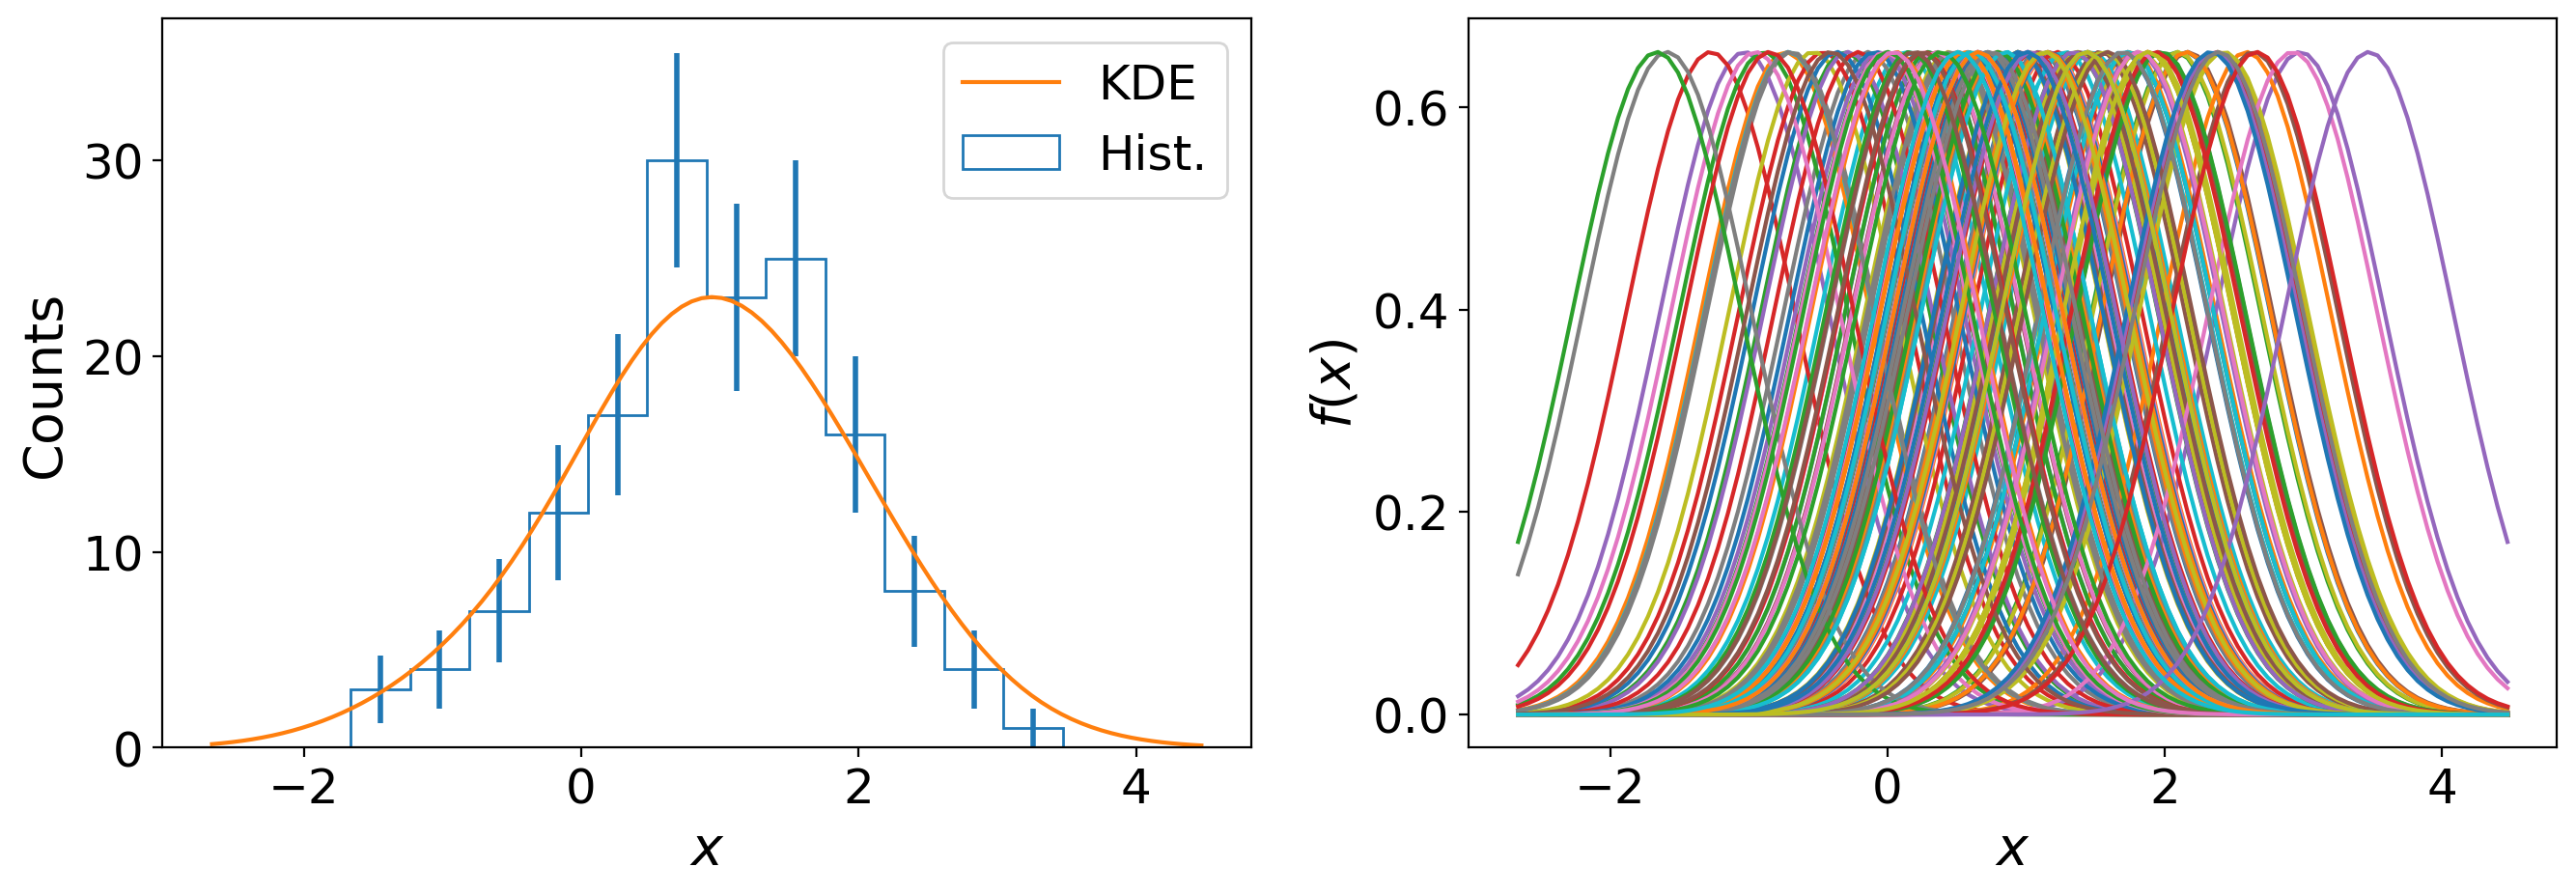

In [92]:
# Fill a np array with a sample of a normal var
N = 150
mean, std = 1, 1
x = np.random.normal(loc=mean, scale=std, size=N)
# Get bins and values
n_bins = 'auto'
x_hist = np.histogram(x, bins=n_bins)

# Initialize entire fig and build histogram
FONTSIZE = 20
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                              figsize=(16, 5), dpi=200)
ax1.hist(x_hist[1][:-1], bins=x_hist[1], weights=x_hist[0], 
        histtype='step', label='Hist.')
ax1.errorbar((x_hist[1][1:]+x_hist[1][:-1])/2, x_hist[0], 
            yerr=np.sqrt(x_hist[0]), fmt='none',
            c='tab:blue', elinewidth=2)
ax1.set_xlabel(r'$x$', fontsize=FONTSIZE)
ax1.set_ylabel('Counts', fontsize=FONTSIZE)
ax1.tick_params(labelsize=FONTSIZE-2)

# Now get gaussians and plot them
margin = 1
dom = np.linspace(x_hist[1].min()-margin,x_hist[1].max()+margin, 
                  num=100) 
def gaussian(x, mean, std):
    scale = 1 / np.sqrt(2*np.pi*std)
    return scale * np.exp(-np.square(x-mean) / (2*std))

i_std = 1.06*x.std()*np.power(x.shape[0], -1/5)
gaussian_vals = np.zeros(dom.shape)
for i in x:
    f = lambda x: gaussian(x, i, i_std)
    f_vals = f(dom)
    gaussian_vals += f_vals
    ax2.plot(dom,f_vals)
ax2.tick_params(labelsize=FONTSIZE-2)
ax2.set_xlabel(r'$x$', fontsize=FONTSIZE)
ax2.set_ylabel(r'$f(x)$', fontsize=FONTSIZE)

# Get KDE and plot with hist.
hist_area = np.mean(x_hist[0]) * (x_hist[1].max() - x_hist[1].min())
kde_area = (dom[1]-dom[0]) * np.sum(gaussian_vals)
kde_vals = hist_area * gaussian_vals / kde_area
ax1.plot(dom, kde_vals, label='KDE')
ax1.legend(fontsize=FONTSIZE-2);

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

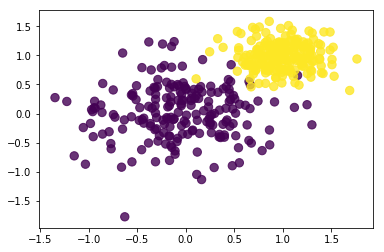

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [93]:
# Let's do this by defining a general function
def gen_multiclass_data(means, sigmas, size, 
                       seed=42):
    '''
    Params:
        means : array-like
            Array of size N containing the 
            mean values of the Gaussian 
            distributions that will be used
            to generate each class data.
        sigmas : array-like
            Array of size N containing the 
            standard deviations of the 
            Gaussian distributions that will
            be used to generate each class
            data.
        size : int
            Size of the generated sample for 
            each class.
        seed : int (optional)
            Seed used to initialize the numpy 
            random generator, included for 
            consistency. Default value is 42.
    Output:
        Array of shape (size,N), where each row 
        is a sample and each column corresponds
        to a given class. The array is filled
        with randomly generated data. In particular
        each column is generated from a Gaussian 
        distribution specific for that class, with
        its own mean and standard deviation.
    '''
    # Init random seed
    np.random.seed(seed)
    # Initialize empty array
    data = np.zeros(shape=(size, len(means)))
    # Fill each column with the corresponding 
    # generated data
    for i in range(len(means)):
        i_data = np.random.normal(loc=means[i], 
                                  scale=sigmas[i],
                                  size=size)
        data[:,i] += i_data
    return data

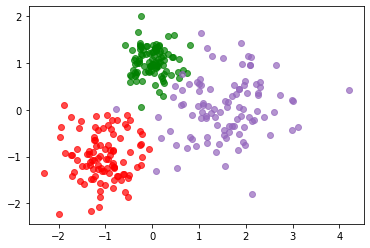

In [101]:
# Generate our data, notice that for 
# 2D data we can just generate the 
# x and y distibutions
size = 100
means_x = [-1, 0, 1.5]
means_y = [-1, 1, 0]
sigmas = [0.5, 0.3, 0.7]

data_x = gen_multiclass_data(means_x, 
                            sigmas=sigmas, 
                            size=size, 
                            seed=42)
data_y = gen_multiclass_data(means_y,
                            sigmas=sigmas,
                            size=size, 
                            seed=532)

# Plot data
colors=['r','g','tab:purple']
for i in range(len(sigmas)):
    plt.scatter(data_x[:,i], data_y[:,i], 
               c=colors[i], alpha=0.7)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot